# Python Machine Learning Demo - Part l

## Overview of the Predictive Modeling Case
A financial services company offers a home equity line of credit to its clients. The
company has extended several thousand lines of credit in the past, and many of these
accepted applicants (approximately 20%) have defaulted on their loans. By using
geographic, demographic, and financial variables, the company wants to build a model
to predict whether an applicant will default.

## Data
After analyzing the data, the company selected a subset of 12 predictor (or input)
variables to model whether each applicant defaulted. The response (or target) variable
(BAD) indicates whether an applicant defaulted on the home equity line of credit.
These variables, along with their model role, measurement level, and description, are
shown in the following table from the **HMEQ** data set.

| Name      | Model Role | Measurement Level | Description                                                            |
|:----------|:-----------|:------------------|:-----------------------------------------------------------------------|
| BAD       | Target     | Binary            | 1 = applicant defaulted on loan or delinquent, 0 = applicant paid loan |
| CLAGE     | Input      | Interval          | Age of oldest credit line in months                                    |
| CLNO      | Input      | Interval          | Number of credit lines                                                 |
| DEBTINC   | Input      | Interval          | Debt-to-income ratio                                                   |
| DELINQ    | Input      | Interval          | Number of delinquent credit lines                                      |
| DEROG     | Input      | Interval          | Number of derogatory reports                                           |
| JOB       | Input      | Nominal           | Occupational categories                                                |
| LOAN      | Input      | Interval          | Amount of loan request                                                 |
| MORTDUE   | Input      | Interval          | Amount due on existing mortgage                                        |
| NINQ      | Input      | Interval          | Number of recent credit inquiries                                      |
| REASON    | Input      | Binary            | DebtCon = debt consolidation, HomeImp = home improvement               |
| VALUE     | Input      | Interval          | Value of current property                                              |
| YOJ       | Input      | Interval          | Years at present job                                                   |

# Load Packages

In [1]:
import swat
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
swat.options.cas.print_messages = True

# Connect to CAS

In [2]:
# CAS(hostname,port,username,password)
conn = swat.CAS("server", 8777, "student", "Metadata0", protocol="http")

# CAS Session

In [3]:
conn.session.listSessions()

[Session]

                              SessionName  \
 0  py-session-1:Wed May  8 10:22:11 2019   
 
                                    UUID      State      Authentication  \
 0  7bd45470-93fb-9c4e-b749-e905a85a684d  Connected  OAuth/External PAM   
 
     Userid  
 0  student  

+ Elapsed: 0.000448s, user: 0.000415s, mem: 0.295mb

In [4]:
# Change timeout
mytime = 60*60*12
conn.session.timeout(time=mytime)
conn.session.sessionStatus()

[ActionStatus]

 'Action is active'

[Authenticated]

 'Yes'

[Timeout]

 43200

[locale]

 'en_US'

[number of Connections]

 1

[state]

 'Connected'

+ Elapsed: 0.000302s, user: 6.2e-05s, sys: 0.000226s, mem: 0.194mb

# Load Data onto the Server

In [5]:
# Read in the hmeq CSV to an in-memory data table and create a CASTable object reference
castbl = conn.read_csv("D:/Workshop/Winsas/VOSI/hmeq.csv", casout = dict(name="hmeq", replace=True))

# Create variable for the in-memory CAS server data set name
indata = 'hmeq'

NOTE: Cloud Analytic Services made the uploaded file available as table HMEQ in caslib CASUSER(student).
NOTE: The table HMEQ has been created in caslib CASUSER(student) from binary data uploaded to Cloud Analytic Services.


# Distributed Data

In [6]:
conn.table.tableDetails(
    level="node",
    caslib="casuser(student)",
    name=indata
)

[TableDetails]

                   Node  Blocks  Active  Rows  IndexSize  DataSize  \
 0  server.demo.sas.com      16      16  5960          0    785334   
 
    VardataSize  CompressedSize  CompressionRatio  Mapped  MappedMemory  \
 0        70134               0                 0       0             0   
 
    Unmapped  UnmappedMemory  Allocated  AllocatedMemory  DeletedRows  
 0         0               0         16           785408            0  

+ Elapsed: 0.000852s, sys: 0.000839s, mem: 0.672mb

In [7]:
conn.table.tableDetails(
    level="block",
    caslib="casuser(student)",
    name=indata
)

[TableDetails]

                    Node  Blocks  Active  Rows  IndexSize  DataSize  \
 0   server.demo.sas.com       1       1   420          0     55122   
 1   server.demo.sas.com       1       1   393          0     51759   
 2   server.demo.sas.com       1       1   384          0     50522   
 3   server.demo.sas.com       1       1   369          0     48593   
 4   server.demo.sas.com       1       1   371          0     48941   
 5   server.demo.sas.com       1       1   364          0     48027   
 6   server.demo.sas.com       1       1   386          0     50761   
 7   server.demo.sas.com       1       1   362          0     47752   
 8   server.demo.sas.com       1       1   361          0     47575   
 9   server.demo.sas.com       1       1   358          0     47243   
 10  server.demo.sas.com       1       1   370          0     48793   
 11  server.demo.sas.com       1       1   366          0     48145   
 12  server.demo.sas.com       1       1   375          0     49436   
 13  server.demo.sas.com       1       1   354          0     46747   
 14  server.demo.sas.com       1       1   358          0     47204   
 15  server.demo.sas.com       1       1   369          0     48714   
 
     VardataSize  CompressedSize  CompressionRatio  Mapped  MappedMemory  \
 0          4722               0                 0       0             0   
 1          4599               0                 0       0             0   
 2          4442               0                 0       0             0   
 3          4313               0                 0       0             0   
 4          4421               0                 0       0             0   
 5          4347               0                 0       0             0   
 6          4441               0                 0       0             0   
 7          4312               0                 0       0             0   
 8          4255               0                 0       0             0   
 9          4283               0                 0       0             0   
 10         4393               0                 0       0             0   
 11         4225               0                 0       0             0   
 12         4436               0                 0       0             0   
 13         4267               0                 0       0             0   
 14         4244               0                 0       0             0   
 15         4434               0                 0       0             0   
 
     Unmapped  UnmappedMemory  Allocated  AllocatedMemory  DeletedRows  
 0          0               0          1            55128            0  
 1          0               0          1            51760            0  
 2          0               0          1            50528            0  
 3          0               0          1            48600            0  
 4          0               0          1            48944            0  
 5          0               0          1            48032            0  
 6          0               0          1            50768            0  
 7          0               0          1            47752            0  
 8          0               0          1            47576            0  
 9          0               0          1            47248            0  
 10         0               0          1            48800            0  
 11         0               0          1            48152            0  
 12         0               0          1            49440            0  
 13         0               0          1            46752            0  
 14         0               0          1            47208            0  
 15         0               0          1            48720            0  

+ Elapsed: 0.000649s, user: 0.000161s, sys: 0.000476s, mem: 0.678mb

In [ ]:
#conn.table.tableDetails(
#    level="node",
#    caslib="casuser(student)",
#    name=indata
#)

#conn.table.tableDetails(
#    level="block",
#    caslib="casuser(student)",
#    name=indata
#)

0     420
1     393
2     384
3     369
4     371
5     364
6     386
7     362
8     361
9     358
10    370
11    366
12    375
13    354
14    358
15    369
Name: Rows, dtype: int64

5960

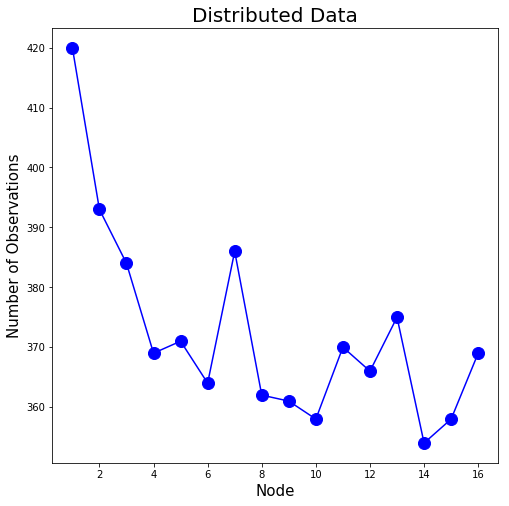

In [8]:
node_data = conn.table.tableDetails(
    level = "block",
    caslib = "casuser(student)",
    name = indata
)['TableDetails']['Rows']

display(node_data)
display(sum(node_data))

plt.figure(figsize=(8,8))
plt.plot(list(range(1,len(node_data)+1)), node_data, color='blue', linestyle='-', marker='o', markersize=12)
plt.title('Distributed Data', fontsize=20)
plt.xlabel('Node', fontsize=15)
plt.ylabel('Number of Observations', fontsize=15)
plt.show()

# In-Memory Data Table, CASTable Object Reference, and a casDataFrame

In [9]:
conn.table.tableInfo()

[TableInfo]

    Name  Rows  Columns  IndexedColumns Encoding        CreateTimeFormatted  \
 0  HMEQ  5960       13               0    utf-8  2019-05-08T10:23:48-04:00   
 
             ModTimeFormatted        AccessTimeFormatted JavaCharSet  \
 0  2019-05-08T10:23:48-04:00  2019-05-08T10:34:01-04:00        UTF8   
 
      CreateTime      ...       Global  Repeated  View  SourceName  \
 0  1.872945e+09      ...            0         0     0               
 
    SourceCaslib Compressed  Creator  Modifier     SourceModTimeFormatted  \
 0                        0  student            2019-05-08T10:23:47-04:00   
 
   SourceModTime  
 0  1.872945e+09  
 
 [1 rows x 22 columns]

+ Elapsed: 0.00099s, user: 0.000237s, sys: 0.00069s, mem: 0.672mb

In [10]:
type(castbl)

swat.cas.table.CASTable

In [11]:
type(castbl.head())

swat.dataframe.SASDataFrame

# SWAT Package Functions

In [14]:
funcs = dir(swat)
display(len(funcs))
funcs[:5]

47

['CAS', 'CASTable', 'SASDataFrame', 'SASFormatter', 'SWATCASActionError']

In [15]:
help('swat.CAS')

Help on class CAS in swat:

swat.CAS = class CAS(builtins.object)
 |  Create a connection to a CAS server.
 |  
 |  Parameters
 |  ----------
 |  hostname : string or list-of-strings, optional
 |      Host to connect to.  If not specified, the value will come
 |      from the ``cas.hostname`` option or ``CASHOST`` environment variable.
 |  port : int or long, optional
 |      Port number.  If not specified, the value will come from the
 |      ``cas.port`` option or ``CASPORT`` environment variable.
 |  username : string, optional
 |      Name of user on CAS host.
 |  password : string, optional
 |      Password of user on CAS host.
 |  session : string, optional
 |      ID of existing session to reconnect to.
 |  locale : string, optional
 |      Name of locale used for the session.
 |  name : string, optional
 |      User-definable name for the session.
 |  nworkers : int or long, optional
 |      Number of worker nodes to use.
 |  authinfo : string or list-of-strings, optional
 |   

# Explore the Data

In [16]:
display(castbl.shape)
list(castbl)

(5960, 13)

['BAD',
 'LOAN',
 'MORTDUE',
 'VALUE',
 'REASON',
 'JOB',
 'YOJ',
 'DEROG',
 'DELINQ',
 'CLAGE',
 'NINQ',
 'CLNO',
 'DEBTINC']

In [17]:
display(castbl.mean())
castbl['BAD'].mean()

BAD             0.199497
LOAN        18607.969799
MORTDUE     73760.817200
VALUE      101776.048741
YOJ             8.922268
DEROG           0.254570
DELINQ          0.449442
CLAGE         179.766275
NINQ            1.186055
CLNO           21.296096
DEBTINC        33.779915
dtype: float64

0.1994966442953

In [19]:
castbl.describe(include=['numeric', 'character', 'sort=True'])

C:\ProgramData\Anaconda3\lib\site-packages\swat\cas\table.py:3784: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  out = pd.concat(x for x in [topk_val, pct, summ, topk_freq]


BAD     LOAN  MORTDUE    VALUE   REASON    JOB      YOJ  \
count       5960     5960     5442     5848     5708   5681     5445   
unique         2      540     5053     5381        2      6       99   
top            0    15000    42000    60000  DebtCon  Other        0   
freq        4771      105       11       15     3928   2388      415   
mean    0.199497    18608  73760.8   101776      NaN    NaN  8.92227   
std     0.399656  11207.5  44457.6  57385.8      NaN    NaN  7.57398   
min            0     1100     2063     8000  DebtCon    Mgr        0   
25%            0    11100    46268    66069      NaN    NaN        3   
50%            0    16300    65019  89235.5      NaN    NaN        7   
75%            0    23300    91491   119832      NaN    NaN       13   
max            1    89900   399550   855909  HomeImp   Self       41   

           DEROG    DELINQ    CLAGE     NINQ     CLNO   DEBTINC  
count       5252      5380     5652     5450     5738      4693  
unique        11        14     5314       16       62      4693  
top            0         0  206.967        0       16   203.312  
freq        4527      4179        7     2531      316         1  
mean     0.25457  0.449442  179.766  1.18606  21.2961   33.7799  
std     0.846047   1.12727  85.8101  1.72867  10.1389   8.60175  
min            0         0        0        0        0  0.524499  
25%            0         0  115.103        0       15     29.14  
50%            0         0  173.467        1       20   34.8183  
75%            0         0  231.575        2       26   39.0031  
max           10        15  1168.23       17       71   203.312

# Wrapper

In [20]:
# Head function on the castbl object
display(castbl.head())

# Fetch action on the server data
conn.table.fetch(table=indata, to=6)

Selected Rows from Table HMEQ

   BAD    LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0  1.0  1100.0  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1  1.0  1300.0  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2  1.0  1500.0  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3  1.0  1500.0      NaN       NaN                    NaN    NaN     NaN   
4  0.0  1700.0  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   

        CLAGE  NINQ  CLNO  DEBTINC  
0   94.366667   1.0   9.0      NaN  
1  121.833333   0.0  14.0      NaN  
2  149.466667   1.0  10.0      NaN  
3         NaN   NaN   NaN      NaN  
4   93.333333   0.0  14.0      NaN

[Fetch]

 Selected Rows from Table HMEQ
 
    BAD    LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
 0  1.0  1100.0  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
 1  1.0  1300.0  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
 2  1.0  1500.0  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
 3  1.0  1500.0      NaN       NaN                    NaN    NaN     NaN   
 4  0.0  1700.0  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   
 5  1.0  1700.0  30548.0   40320.0  HomeImp   Other   9.0    0.0     0.0   
 
         CLAGE  NINQ  CLNO    DEBTINC  
 0   94.366667   1.0   9.0        NaN  
 1  121.833333   0.0  14.0        NaN  
 2  149.466667   1.0  10.0        NaN  
 3         NaN   NaN   NaN        NaN  
 4   93.333333   0.0  14.0        NaN  
 5  101.466002   1.0   8.0  37.113614  

+ Elapsed: 0.00153s, user: 0.00151s, mem: 0.852mb

In [21]:
# nrow function on the castbl object
display(castbl.shape[0])

# recordCount action on the server data
conn.table.recordCount(table=indata)

5960

[RecordCount]

 Number of records in HMEQ.
 
       N
 0  5960

+ Elapsed: 0.000498s, user: 0.000166s, sys: 0.000316s, mem: 0.402mb

# List Action Sets

In [22]:
#http://go.documentation.sas.com/?cdcId=pgmcdc&cdcVersion=8.11&docsetId=allprodsactions&docsetTarget=actionSetsByName.htm&locale=en

# Explore the Data using CAS Actions

In [23]:
conn.loadActionSet('simple')
actions = conn.builtins.help(actionSet='simple')

NOTE: Added action set 'simple'.
NOTE: Information for action set 'simple':
NOTE:    simple
NOTE:       mdSummary - Calculates multidimensional summaries of numeric variables
NOTE:       numRows - Shows the number of rows in a Cloud Analytic Services table
NOTE:       summary - Generates descriptive statistics of numeric variables such as the sample mean, sample variance, sample size, sum of squares, and so on
NOTE:       correlation - Computes Pearson product-moment correlations.
NOTE:       regression - Performs a linear regression up to 3rd-order polynomials
NOTE:       crossTab - Performs one-way or two-way tabulations
NOTE:       distinct - Computes the distinct number of values of the variables in the variable list
NOTE:       topK - Returns the top-K and bottom-K distinct values of each variable included in the variable list based on a user-specified ranking order
NOTE:       groupBy - Builds BY groups in terms of the variable value combinations given the variables in the variab

In [24]:
conn.simple.correlation(
    table = indata,
    inputs = ["LOAN","VALUE","MORTDUE"]
)

[CorrSimple]

 Summary Statistics in Correlation Analysis for HMEQ
 
   Variable       N           Mean           Sum        StdDev  Minimum  \
 0     LOAN  5960.0   18607.969799  1.109035e+08  11207.480417   1100.0   
 1    VALUE  5848.0  101776.048741  5.951863e+08  57385.775334   8000.0   
 2  MORTDUE  5442.0   73760.817200  4.014064e+08  44457.609458   2063.0   
 
     Maximum  
 0   89900.0  
 1  855909.0  
 2  399550.0  

[Correlation]

 Pearson Correlation Coefficients for HMEQ
 
   Variable      LOAN     VALUE   MORTDUE   Nobs1   Nobs2   Nobs3
 0     LOAN  1.000000  0.335393  0.228595  5960.0  5848.0  5442.0
 1    VALUE  0.335393  1.000000  0.875666  5848.0  5848.0  5357.0
 2  MORTDUE  0.228595  0.875666  1.000000  5442.0  5357.0  5442.0

+ Elapsed: 0.089s, user: 0.00315s, sys: 0.136s, mem: 2.71mb

In [25]:
conn.simple.distinct(
    table = indata,
    inputs = list(castbl)
)

[Distinct]

 Distinct Counts for HMEQ
 
      Column  NDistinct   NMiss  Trunc
 0       BAD        2.0     0.0    0.0
 1      LOAN      540.0     0.0    0.0
 2   MORTDUE     5054.0   518.0    0.0
 3     VALUE     5382.0   112.0    0.0
 4    REASON        3.0   252.0    0.0
 5       JOB        7.0   279.0    0.0
 6       YOJ      100.0   515.0    0.0
 7     DEROG       12.0   708.0    0.0
 8    DELINQ       15.0   580.0    0.0
 9     CLAGE     5315.0   308.0    0.0
 10     NINQ       17.0   510.0    0.0
 11     CLNO       63.0   222.0    0.0
 12  DEBTINC     4694.0  1267.0    0.0

+ Elapsed: 0.0135s, user: 0.0356s, sys: 0.00651s, mem: 9.46mb

In [26]:
conn.simple.freq(
    table = indata,
    inputs = ["BAD","JOB","REASON"]
)

[Frequency]

 Frequency for HMEQ
 
     Column  NumVar  CharVar        FmtVar  Level  Frequency
 0      BAD     0.0                      0      1     4771.0
 1      BAD     1.0                      1      2     1189.0
 2      JOB     NaN                             1      279.0
 3      JOB     NaN      Mgr           Mgr      2      767.0
 4      JOB     NaN   Office        Office      3      948.0
 5      JOB     NaN    Other         Other      4     2388.0
 6      JOB     NaN  ProfExe       ProfExe      5     1276.0
 7      JOB     NaN    Sales         Sales      6      109.0
 8      JOB     NaN     Self          Self      7      193.0
 9   REASON     NaN                             1      252.0
 10  REASON     NaN  DebtCon       DebtCon      2     3928.0
 11  REASON     NaN  HomeImp       HomeImp      3     1780.0

+ Elapsed: 0.00478s, user: 0.00399s, sys: 0.00807s, mem: 3.52mb

In [27]:
conn.simple.crossTab(
    table = indata,
    row = "BAD", col = "JOB"
)

[Crosstab]

             BAD   Col1   Col2    Col3    Col4  Col5   Col6
 0             0  588.0  823.0  1834.0  1064.0  71.0  135.0
 1             1  179.0  125.0   554.0   212.0  38.0   58.0

+ Elapsed: 0.00377s, user: 0.00908s, mem: 1.34mb

In [28]:
conn.loadActionSet('cardinality')
actions = conn.builtins.help(actionSet='cardinality')

NOTE: Added action set 'cardinality'.
NOTE: Information for action set 'cardinality':
NOTE:    cardinality
NOTE:       summarize - Provides actions for evaluating data cardinality


In [29]:
conn.cardinality.summarize(
    table = indata,
    cardinality = dict(name='card', replace=True)
)

NOTE: Writing cardinality.
NOTE: status = 0.
NOTE: The Cloud Analytic Services server processed the request in 0.018069 seconds.


+ Elapsed: 0.0188s, user: 0.0481s, sys: 0.01s, mem: 2.62mb

In [30]:
display(conn.table.fetch(table='card', to=5))
conn.table.recordCount(table='card')

[Fetch]

 Selected Rows from Table CARD
 
   _VARNAME_  _FMTWIDTH_ _TYPE_  _RLEVEL_ _ORDER_ _MORE_  _CARDINALITY_  \
 0       BAD        12.0      N     CLASS     ASC      N            2.0   
 1      LOAN        12.0      N  INTERVAL     ASC      Y           30.0   
 2   MORTDUE        12.0      N  INTERVAL     ASC      Y           30.0   
 3     VALUE        12.0      N  INTERVAL     ASC      Y           30.0   
 4    REASON         7.0      C     CLASS     ASC      N            2.0   
 
    _NOBS_  _SUMFREQS_  _NMISS_      ...      _SKEWNESS_  _KURTOSIS_  _MFREQ_  \
 0  5960.0      5960.0      0.0      ...        1.504317    0.263057   4771.0   
 1  5960.0      5960.0      0.0      ...        2.023781    6.932590   5829.0   
 2  5960.0      5442.0    518.0      ...        1.814481    6.481866   5411.0   
 3  5960.0      5848.0    112.0      ...        3.053344   24.362805   5818.0   
 4  5960.0      5708.0    252.0      ...             NaN         NaN   3928.0   
 
    _MFREQFOUNDLEVEL_  _MFREQNUM_  _MFREQCHR_   _MFREQCFMT_  _LASTNUM_  \
 0                  Y         0.0                         0        1.0   
 1                  N         NaN                               4700.0   
 2                  N         NaN                               6124.0   
 3                  N         NaN                              20631.0   
 4                  Y         NaN     DebtCon       DebtCon        NaN   
 
    _LASTCHR_    _LASTCFMT_  
 0                        1  
 1                     4700  
 2                     6124  
 3                    20631  
 4    HomeImp       HomeImp  
 
 [5 rows x 26 columns]

+ Elapsed: 0.00164s, user: 0.00124s, sys: 0.00038s, mem: 0.882mb

[RecordCount]

 Number of records in CARD.
 
     N
 0  13

+ Elapsed: 0.000794s, user: 0.000778s, mem: 0.433mb

# Define Cas Table

In [31]:
card = conn.CASTable(name = "card")
display(card.head())
card.shape

Selected Rows from Table CARD

  _VARNAME_  _FMTWIDTH_ _TYPE_  _RLEVEL_ _ORDER_ _MORE_  _CARDINALITY_  \
0       BAD        12.0      N     CLASS     ASC      N            2.0   
1      LOAN        12.0      N  INTERVAL     ASC      Y           30.0   
2   MORTDUE        12.0      N  INTERVAL     ASC      Y           30.0   
3     VALUE        12.0      N  INTERVAL     ASC      Y           30.0   
4    REASON         7.0      C     CLASS     ASC      N            2.0   

   _NOBS_  _SUMFREQS_  _NMISS_      ...      _SKEWNESS_  _KURTOSIS_  _MFREQ_  \
0  5960.0      5960.0      0.0      ...        1.504317    0.263057   4771.0   
1  5960.0      5960.0      0.0      ...        2.023781    6.932590   5829.0   
2  5960.0      5442.0    518.0      ...        1.814481    6.481866   5411.0   
3  5960.0      5848.0    112.0      ...        3.053344   24.362805   5818.0   
4  5960.0      5708.0    252.0      ...             NaN         NaN   3928.0   

   _MFREQFOUNDLEVEL_  _MFREQNUM_  _MFREQCHR_   _MFREQCFMT_  _LASTNUM_  \
0                  Y         0.0                         0        1.0   
1                  N         NaN                               4700.0   
2                  N         NaN                               6124.0   
3                  N         NaN                              20631.0   
4                  Y         NaN     DebtCon       DebtCon        NaN   

   _LASTCHR_    _LASTCFMT_  
0                        1  
1                     4700  
2                     6124  
3                    20631  
4    HomeImp       HomeImp  

[5 rows x 26 columns]

(13, 26)

# Visualize Numeric Variables Locally

In [32]:
conn.loadActionSet('sampling')
actions = conn.builtins.help(actionSet='sampling')

NOTE: Added action set 'sampling'.
NOTE: Information for action set 'sampling':
NOTE:    sampling
NOTE:       srs -  Samples a proportion of data from the input table or partitions the data into no more than three portions
NOTE:       stratified - Samples a proportion of data or partitions the data into no more than three portions within each stratum
NOTE:       oversample - Samples a user-specified proportion of data from the event level and adjusts the ratio between rare events and non-rare events to a user-specified ratio
NOTE:       kfold - K-fold partitioning.


In [33]:
conn.sampling.srs(
    table   = indata,
    samppct = 50,
    seed = 12345,
    partind = False,
    output  = dict(casOut = dict(name = 'mysam', replace = True),  copyVars = 'ALL')
)

NOTE: Using SEED=12345 for sampling.


[OutputCasTables]

              casLib   Name Label  Rows  Columns  \
 0  CASUSER(student)  mysam        2980       13   
 
                                        casTable  
 0  CASTable('mysam', caslib='CASUSER(student)')  

[SRSFreq]

 Frequencies
 
    NObs  NSamp
 0  5960   2980

[outputSize]

 {'outputNObs': 2980, 'outputNVars': 13}

+ Elapsed: 0.126s, user: 0.0145s, sys: 0.00822s, mem: 37.4mb

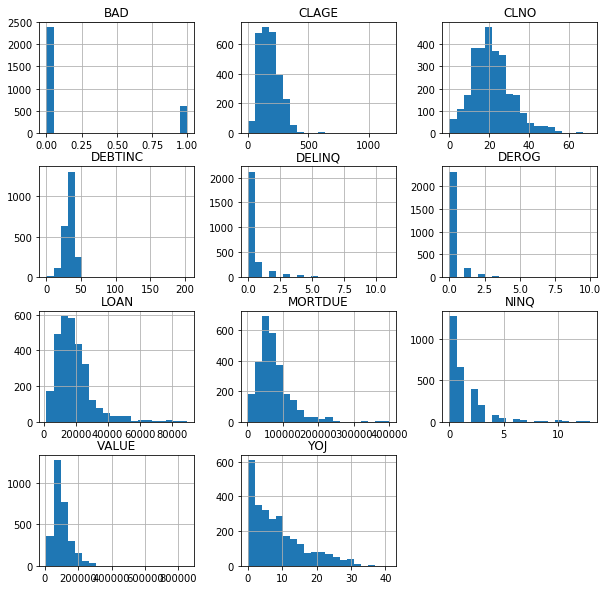

In [34]:
# Create connection object
mysam = conn.CASTable(name = "mysam")

# Bring data locally
df = mysam.to_frame()

# Create histograms of the numeric columns
df.hist(bins=20, figsize=(10,10))
plt.show()

# Check Data for Missing Values

In [35]:
# Create a casDataFrame containing number of missing values for each variable
tbl = castbl.distinct()['Distinct'][['Column', 'NMiss']]
display(type(tbl))
tbl 

swat.dataframe.SASDataFrame

Distinct Counts for HMEQ

     Column   NMiss
0       BAD     0.0
1      LOAN     0.0
2   MORTDUE   518.0
3     VALUE   112.0
4    REASON   252.0
5       JOB   279.0
6       YOJ   515.0
7     DEROG   708.0
8    DELINQ   580.0
9     CLAGE   308.0
10     NINQ   510.0
11     CLNO   222.0
12  DEBTINC  1267.0

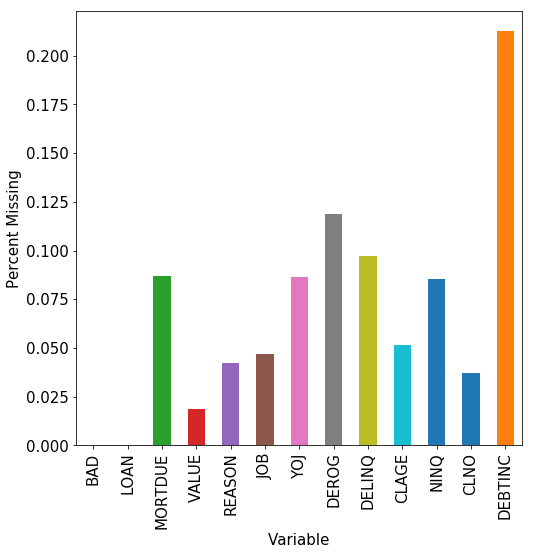

In [37]:
# Plot the percent of missing values locally
nr = castbl.shape[0]
tbl['PctMiss'] = tbl['NMiss']/nr
MissPlot = tbl.plot(x='Column', y='PctMiss', kind='bar', figsize=(8,8), fontsize=15)
MissPlot.set_xlabel('Variable', fontsize=15)
MissPlot.set_ylabel('Percent Missing', fontsize=15)
MissPlot.legend_.remove()
plt.show()

# Impute Missing Values

In [38]:
# Impute missing values with the median for continuous variables and most frequent for nominal variables
conn.dataPreprocess.impute(
    table = indata,
    methodContinuous = 'MEDIAN',
    methodNominal    = 'MODE',
    inputs           = list(castbl)[1:],
    copyAllVars      = True,
    casOut           = dict(name = indata, replace = True)
)

[ImputeInfo]

 Imputation Information for HMEQ
 
    Variable ImputeTech    ResultVar       N   NMiss  ImputedValueContinuous  \
 0      LOAN     Median     IMP_LOAN  5960.0     0.0            16300.000000   
 1   MORTDUE     Median  IMP_MORTDUE  5442.0   518.0            65019.000000   
 2     VALUE     Median    IMP_VALUE  5848.0   112.0            89235.500000   
 3    REASON       Mode   IMP_REASON  5708.0   252.0                     NaN   
 4       JOB       Mode      IMP_JOB  5681.0   279.0                     NaN   
 5       YOJ     Median      IMP_YOJ  5445.0   515.0                7.000000   
 6     DEROG     Median    IMP_DEROG  5252.0   708.0                0.000000   
 7    DELINQ     Median   IMP_DELINQ  5380.0   580.0                0.000000   
 8     CLAGE     Median    IMP_CLAGE  5652.0   308.0              173.466667   
 9      NINQ     Median     IMP_NINQ  5450.0   510.0                1.000000   
 10     CLNO     Median     IMP_CLNO  5738.0   222.0               20.000000   
 11  DEBTINC     Median  IMP_DEBTINC  4693.0  1267.0               34.818262   
 
    ImputedValueNominal  
 0                       
 1                       
 2                       
 3              DebtCon  
 4                Other  
 5                       
 6                       
 7                       
 8                       
 9                       
 10                      
 11                      

[OutputCasTables]

              casLib  Name  Rows  Columns  \
 0  CASUSER(student)  hmeq  5960       25   
 
                                       casTable  
 0  CASTable('hmeq', caslib='CASUSER(student)')  

+ Elapsed: 0.0217s, user: 0.0894s, sys: 0.00673s, mem: 38.7mb

# Create Variable Shortcuts

In [39]:
# Get variable info and types
colinfo = conn.table.columninfo(table=indata)['ColumnInfo']
colinfo

Column  ID     Type  RawLength  FormattedLength  NFL  NFD
0           BAD   1   double          8               12    0    0
1          LOAN   2   double          8               12    0    0
2       MORTDUE   3   double          8               12    0    0
3         VALUE   4   double          8               12    0    0
4        REASON   5  varchar          7                7    0    0
5           JOB   6  varchar          7                7    0    0
6           YOJ   7   double          8               12    0    0
7         DEROG   8   double          8               12    0    0
8        DELINQ   9   double          8               12    0    0
9         CLAGE  10   double          8               12    0    0
10         NINQ  11   double          8               12    0    0
11         CLNO  12   double          8               12    0    0
12      DEBTINC  13   double          8               12    0    0
13    IMP_CLAGE  14   double          8               12    0    0
14     IMP_CLNO  15   double          8               12    0    0
15  IMP_DEBTINC  16   double          8               12    0    0
16   IMP_DELINQ  17   double          8               12    0    0
17    IMP_DEROG  18   double          8               12    0    0
18     IMP_LOAN  19   double          8               12    0    0
19  IMP_MORTDUE  20   double          8               12    0    0
20     IMP_NINQ  21   double          8               12    0    0
21    IMP_VALUE  22   double          8               12    0    0
22      IMP_YOJ  23   double          8               12    0    0
23      IMP_JOB  24  varchar          7                7    0    0
24   IMP_REASON  25  varchar          7                7    0    0

In [40]:
# Target variable is the first variable
target = colinfo['Column'][0]

# Get all variables
inputs = list(colinfo['Column'][1:])
nominals = list(colinfo.query('Type=="varchar"')['Column'])

# Get only imputed variables
inputs = [k for k in inputs if 'IMP_' in k]
nominals = [k for k in nominals if 'IMP_' in k]
nominals = [target] + nominals

# Print
display(target)
display(inputs)
display(nominals)

'BAD'

['IMP_CLAGE',
 'IMP_CLNO',
 'IMP_DEBTINC',
 'IMP_DELINQ',
 'IMP_DEROG',
 'IMP_LOAN',
 'IMP_MORTDUE',
 'IMP_NINQ',
 'IMP_VALUE',
 'IMP_YOJ',
 'IMP_JOB',
 'IMP_REASON']

['BAD', 'IMP_JOB', 'IMP_REASON']

# Python Machine Learning Demo - Part ll

# Split the Data into Training and Validation

In [ ]:
# Partition the data
conn.sampling.srs(
    table   = indata,
    samppct = 70,
    seed = 919,
    partind = True,
    output  = dict(casOut = dict(name = indata, replace = True),  copyVars = 'ALL')
)

# View the partition

In [ ]:
conn.loadActionSet('fedSql')
actions = conn.builtins.help(actionSet='fedSql')

In [ ]:
# Make sure the partition worked correctly using SQL
counts = conn.fedSql.execDirect(query =
    '''
    SELECT _PartInd_, count(*) 
    FROM hmeq 
    GROUP BY _PartInd_;
    '''
)['Result Set']

display(counts)
counts['Percent'] = counts['COUNT']/sum(counts['COUNT'])
counts

In [ ]:
# Refresh the castbl object
castbl = conn.CASTable(name=indata)

# Make sure the partition worked correctly using Python code
castbl['_PartInd_'].mean()

# Dimension Reduction - Var Reduce

In [ ]:
conn.loadActionSet('varReduce')
actions = conn.builtins.help(actionSet='varReduce')

In [ ]:
varReduce_obj = conn.varReduce.super(
    table = indata,
    target = target,
    inputs = inputs,
    nominals = nominals,
    varexp = 0.90
)

list(varReduce_obj)

In [ ]:
varReduce_obj['SelectionSummary']

In [ ]:
display(varReduce_obj['SelectedEffects'])
list(varReduce_obj['SelectedEffects']['Variable'])

# Logistic Regression

In [ ]:
conn.loadActionSet('regression')
actions = conn.builtins.help(actionSet='regression')

In [ ]:
conn.regression.logistic(
    table    = dict(name = indata, where = '_PartInd_ = 1'),
    classVars = nominals[1:],
    model = dict(depvar=target, effects=inputs, dist='binomial', link='logit'),
    store    = dict(name='lr_model',replace=True)
)

# Support Vector Machine

In [ ]:
conn.loadActionSet('svm')
actions = conn.builtins.help(actionSet='svm')

In [ ]:
conn.svm.svmTrain(
    table    = dict(name = indata, where = '_PartInd_ = 1'),
    target   = target, 
    inputs   = inputs, 
    nominals = nominals,
    kernel = 'polynomial', 
    degree = 2,
    savestate = dict(name = 'svm_model', replace = True)
)

# Decision Tree

In [ ]:
conn.loadActionSet('decisionTree')
actions = conn.builtins.help(actionSet='decisionTree')

In [ ]:
conn.decisionTree.dtreeTrain(
    table    = dict(name = indata, where = '_PartInd_ = 1'),
    target   = target, 
    inputs   = inputs, 
    nominals = nominals,
    casOut   = dict(name = 'dt_model', replace = True)
)

# Random Forest

In [ ]:
conn.decisionTree.forestTrain(
    table    = dict(name = indata, where = '_PartInd_ = 1'),
    target   = target, 
    inputs   = inputs, 
    nominals = nominals,
    nTree    = 1000,
    casOut   = dict(name = 'rf_model', replace = True)
)

# Gradient Boosting

In [ ]:
conn.decisionTree.gbtreeTrain(
    table    = dict(name = indata, where = '_PartInd_ = 1'),
    target   = target, 
    inputs   = inputs, 
    nominals = nominals,
    nTree    = 1000,
    casOut   = dict(name = 'gbt_model', replace = True)
)

# Neural Network

In [ ]:
conn.loadActionSet('neuralNet')
actions = conn.builtins.help(actionSet='neuralNet')

In [ ]:
# Build a neural network model
conn.neuralNet.annTrain(
    table    = dict(name = indata, where = '_PartInd_ = 1'),
    target   = target, 
    inputs   = inputs, 
    nominals = nominals,
    hiddens = [150],
    nloOpts    = dict(optmlOpt = dict(maxIters = 100, 
                      fConv = 1e-10),
                      lbfgsOpt = dict(numCorrections = 6)),
    casOut   = dict(name = 'nn_model', replace = True)
)

# Score the Models

In [ ]:
conn.loadActionSet('aStore')
actions = conn.builtins.help(actionSet='aStore')

In [ ]:
#Score the support vector machine model
conn.aStore.score(
    table    = dict(name = indata, where = '_PartInd_ = 0'),
    rstore = "svm_model",
    out = dict(name="svm_scored", replace=True)
)

In [ ]:
#Score the logistic regression model
lr_score_obj = conn.regression.logisticScore(
    table    = dict(name = indata, where = '_PartInd_ = 0'),
    restore = "lr_model",
    casout = dict(name="lr_scored", replace=True),
    copyVars = target
)

#Score the decision tree model
dt_score_obj = conn.decisionTree.dtreeScore(
    table    = dict(name = indata, where = '_PartInd_ = 0'),
    model = "dt_model",
    casout = dict(name="dt_scored",replace=True),
    copyVars = target,
    encodename = True,
    assessonerow = True
)

#Score the random forest model
rf_score_obj = conn.decisionTree.forestScore(
    table    = dict(name = indata, where = '_PartInd_ = 0'),
    model = "rf_model",
    casout = dict(name="rf_scored",replace=True),
    copyVars = target,
    encodename = True,
    assessonerow = True
)

#Score the gradient boosting model
gb_score_obj = conn.decisionTree.gbtreeScore(
    table    = dict(name = indata, where = '_PartInd_ = 0'),
    model = "gbt_model",
    casout = dict(name="gbt_scored",replace=True),
    copyVars = target,
    encodename = True,
    assessonerow = True
)

#Score the neural network model
nn_score_obj = conn.neuralNet.annScore(
    table    = dict(name = indata, where = '_PartInd_ = 0'),
    model = "nn_model",
    casout = dict(name="nn_scored",replace=True),
    copyVars = target,
    encodename = True,
    assessonerow = True
)

In [ ]:
#View selected fields from the output object
display(nn_score_obj['OutputCasTables'])
nn_score_obj['ScoreInfo']

# Assess the Models

In [ ]:
conn.loadActionSet('percentile')
actions = conn.builtins.help(actionSet='percentile')

In [ ]:
# Change the name of the prediction variable for logistic regression
conn.dataStep.runCode(code='''
    data lr_scored;
        set lr_scored;
        rename _PRED_ = P_BAD1;
    run;
'''
)

# Add the target variable to the svm scored table
conn.dataStep.runCode(code='''
    data svm_scored;
        merge svm_scored(keep=P_BAD1) lr_scored(keep=BAD);
    run;
'''
)

In [ ]:
# Create prediction variable name
assess_input = 'P_' + target + '1'

# Assess the logistic regression model
lr_assess_obj = conn.percentile.assess(
   table = 'lr_scored',
   inputs = assess_input,
   casout = dict(name="lr_assess",replace=True),
   response = target,
   event = "1"
)

# Assess the support vector machine model
svm_assess_obj = conn.percentile.assess(
   table = 'svm_scored',
   inputs = assess_input,
   casout = dict(name="svm_assess",replace=True),
   response = target,
   event = "1"
)

# Assess the decision tree model
dt_assess_obj = conn.percentile.assess(
   table = "dt_scored",
   inputs = assess_input,
   casout = dict(name="dt_assess",replace=True),
   response = target,
   event = "1"
)

# Assess the random forest model
rf_assess_obj = conn.percentile.assess(
   table = "rf_scored",
   inputs = assess_input,
   casout = dict(name="rf_assess",replace=True),
   response = target,
   event = "1"
)

#Assess the gradient boosting model
gb_assess_obj = conn.percentile.assess(
   table = "gbt_scored",
   inputs = assess_input,
   casout = dict(name="gbt_assess",replace=True),
   response = target,
   event = "1"
)

# Assess the neural network model
nn_assess_obj = conn.percentile.assess(
   table = "nn_scored",
   inputs = assess_input,
   casout = dict(name="nn_assess",replace=True),
   response = target,
   event = "1"
)

In [ ]:
nn_assess_obj['OutputCasTables']

# View the Assess Action Output

In [ ]:
display(conn.table.fetch(table='nn_assess', to=5))
conn.table.fetch(table='nn_assess_ROC', to=5)

# Bring Results to the Client

In [ ]:
# Create table objects from the assess output, 
# bring data to the client, 
# and add new variable to data frame indicating model name

lr_assess_ROC = conn.CASTable(name = "lr_assess_ROC")
lr_assess_ROC = lr_assess_ROC.to_frame()
lr_assess_ROC['Model'] = 'Logistic Regression'

svm_assess_ROC = conn.CASTable(name = "svm_assess_ROC")
svm_assess_ROC = svm_assess_ROC.to_frame()
svm_assess_ROC['Model'] = 'Support Vector Machine'

dt_assess_ROC = conn.CASTable(name = "dt_assess_ROC")
dt_assess_ROC = dt_assess_ROC.to_frame()
dt_assess_ROC['Model']= 'Decision Tree'

rf_assess_ROC = conn.CASTable(name = "rf_assess_ROC")
rf_assess_ROC = rf_assess_ROC.to_frame()
rf_assess_ROC['Model'] = 'Random Forest'

gbt_assess_ROC = conn.CASTable(name = "gbt_assess_ROC")
gbt_assess_ROC = gbt_assess_ROC.to_frame()
gbt_assess_ROC['Model'] = 'Gradient Boosting'

nn_assess_ROC = conn.CASTable(name = "nn_assess_ROC")
nn_assess_ROC = nn_assess_ROC.to_frame()
nn_assess_ROC['Model'] = 'Neural Network'

# Compare Confusion Matrix

In [ ]:
df_assess = pd.DataFrame()
df_assess = pd.concat([lr_assess_ROC,svm_assess_ROC,dt_assess_ROC,rf_assess_ROC,gbt_assess_ROC,nn_assess_ROC])
cutoff_index = df_assess['_Cutoff_']==0.5
compare = df_assess[cutoff_index].reset_index(drop=True)
compare[['Model','_TP_','_FP_','_FN_','_TN_']]

# Compare Misclassification

In [ ]:
compare['Misclassification'] = 1-compare['_ACC_']
miss = compare[compare['_Cutoff_']==0.5][['Model','Misclassification']]
miss.sort_values('Misclassification')

# Compare ROC Curves

In [ ]:
plt.figure(figsize=(8,8))
plt.plot()
models = list(df_assess.Model.unique())
display(models)

# Iteratively add each curve to the plot
for X in models:
    tmp = df_assess[df_assess['Model']==X]
    plt.plot(tmp['_FPR_'],tmp['_Sensitivity_'], label=X+' (C=%0.2f)'%tmp['_C_'].mean())

plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.legend(loc='lower right', fontsize=15)
plt.show()

# Compare Lift Curves

In [ ]:
lr_assess_lift = conn.CASTable(name = "lr_assess")
lr_assess_lift = lr_assess_lift.to_frame()
lr_assess_lift['Model'] = 'Logistic Regression'

svm_assess_lift = conn.CASTable(name = "svm_assess")
svm_assess_lift = svm_assess_lift.to_frame()
svm_assess_lift['Model'] = 'Support Vector Machine'

dt_assess_lift = conn.CASTable(name = "dt_assess")
dt_assess_lift = dt_assess_lift.to_frame()
dt_assess_lift['Model']= 'Decision Tree'

rf_assess_lift = conn.CASTable(name = "rf_assess")
rf_assess_lift = rf_assess_lift.to_frame()
rf_assess_lift['Model'] = 'Random Forest'

gbt_assess_lift = conn.CASTable(name = "gbt_assess")
gbt_assess_lift = gbt_assess_lift.to_frame()
gbt_assess_lift['Model'] = 'Gradient Boosting'

nn_assess_lift = conn.CASTable(name = "nn_assess")
nn_assess_lift = nn_assess_lift.to_frame()
nn_assess_lift['Model'] = 'Neural Network'

df_assess = pd.DataFrame()
df_assess = pd.concat([lr_assess_lift,svm_assess_lift,dt_assess_lift,rf_assess_lift,gbt_assess_lift,nn_assess_lift])

In [ ]:
plt.figure(figsize=(8,8))
plt.plot()
models = list(df_assess.Model.unique())
display(models)

# Iteratively add curves to the plot
for X in models:
    tmp = df_assess[df_assess['Model']==X]
    plt.plot(tmp['_Depth_'],tmp['_CumLift_'], label=X)

plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

# Fit an XGBoost Model in R Locally

In [ ]:
# Create sample to bring to the client
conn.sampling.srs(
    table   = indata,
    samppct = 75,
    seed = 12345,
    partind = False,
    output  = dict(casOut = dict(name = 'mysam', replace = True),  copyVars = 'ALL')
)

In [ ]:
# Bring data locally
mysam = conn.CASTable(name = "mysam")
df = mysam.to_frame()
df = df[[target]+inputs+['_PartInd_']]

# Create dummy variables
df = pd.concat([df, pd.get_dummies(df[nominals[1:]])], axis=1).drop(nominals[1:], axis=1)

# Split into training and validation
train = df[df['_PartInd_']==1]
valid = df[df['_PartInd_']==0]

# Split target and inputs
x_train = train.drop(target, axis=1)
x_valid = valid.drop(target, axis=1)
y_train = train[target]
y_valid = valid[target]

# Build python gradient boosting model with scikit-learn
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Fit the model locally
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)

# Score and Assess XGBoost on Validation Data

In [ ]:
gb_score = gb.predict(x_valid)
gb_misclassification = 1 - accuracy_score(y_valid, gb_score)
pymiss = pd.DataFrame({'Model':'Python - Gradient Boosting', 'Misclassification':gb_misclassification}, index=[0])
pymiss

# Final Assessment with CAS and Python Models

In [ ]:
# Combine the assessments and order by most accurate on validation data
miss_all = pd.DataFrame(miss).append(pymiss, ignore_index=True)
miss_all.sort_values('Misclassification').reset_index(drop=True)

# View All Data Tables in Current Session

In [ ]:
conn.table.tableInfo()['TableInfo'][['Name','Rows','Columns']]

# Add caslib to specify a data source

In [ ]:
# Show the current location
conn.table.caslibInfo(active=False, caslib="casuser(student)")

In [ ]:
# Add CAS library named mycl on the server
conn.table.addCaslib(name="mycl", path="/workshop/winsas/VOSI", 
                    dataSource="PATH", description="Personal File Save Location", activeOnAdd=False)

In [ ]:
# Show the current location
conn.table.caslibInfo()

# Save the Best Model

In [ ]:
conn.table.save(caslib = 'mycl', table = dict(name = 'gbt_model'), name = 'best_model_gbt', replace = True)

In [ ]:
# Save the Model Attributes
conn.table.attribute(caslib = 'CASUSER(student)', table = 'gbt_model_attr', name = 'gbt_model', task='convert')
conn.table.save(caslib = 'mycl', table = 'gbt_model_attr', name = 'attr', replace = True)

# Drop a CASLIB

In [ ]:
conn.table.dropCaslib(caslib="mycl")

# Promote Data Table to Global Scope

In [ ]:
conn.table.promote(caslib="casuser(student)", name=indata)
conn.table.tableInfo()

# End the Session

In [ ]:
conn.session.endSession()

# Python Machine Learning Demo - Part lll

![title](sas_viya_logo.png)

# Python Machine Learning Demo - Part lV

In [ ]:
conn = swat.CAS("server", 8777, "student", "Metadata0", protocol="http")

In [ ]:
conn.table.tableInfo()

In [ ]:
indata = 'hmeq'
conn.table.fetch(table=indata, to=6)

In [ ]:
# Target variable is the first variable
target = colinfo['Column'][0]

# Get all variables
inputs = list(colinfo['Column'][1:])
nominals = list(colinfo.query('Type=="varchar"')['Column'])

# Get only imputed variables
inputs = [k for k in inputs if 'IMP_' in k]
nominals = [k for k in nominals if 'IMP_' in k]
nominals = [target] + nominals

# Print
display(target)
display(inputs)
display(nominals)

# Load a Saved Table into Memory

In [ ]:
# Create CASLIB
conn.table.addCaslib(name="mycl", path="/workshop/winsas/VOSI", 
                    dataSource="PATH", activeOnAdd = False, description="Personal File Save Location")

# Load table and table attributes into memory
conn.table.loadTable(caslib = 'mycl', path="best_model_gbt.sashdat", casOut=dict(name="gbt_model", replace=True))
conn.table.loadTable(caslib = 'mycl', path="attr.sashdat", casOut=dict(name="gbt_model_attr", replace=True))
conn.table.attribute(caslib='CASUSER(student)', task='ADD', name='gbt_model', attrtable='gbt_model_attr')

conn.table.tableInfo()

# Model Tuning

In [ ]:
conn.loadActionSet('autotune')
actions = conn.builtins.help(actionSet='autotune')

# Forest Tuning

In [ ]:
conn.autotune.tuneForest(
    trainOptions = dict(
        table    = dict(name = indata, where = '_PartInd_ = 1'),
        target   = target, 
        inputs   = inputs, 
        nominals = nominals,
        casOut   = dict(name = 'rf_tune_model', replace = True) ) ,
    tunerOptions = dict(seed = 802, maxEvals = 10, maxTime = 30)
)

# Deep Neural Network

In [ ]:
conn.loadActionSet('neuralNet')
actions = conn.builtins.help(actionSet='neuralNet')

In [ ]:
conn.neuralNet.annTrain(
    table    = dict(name = indata, where = '_PartInd_ = 1'),
    target   = target, 
    inputs   = inputs, 
    nominals = nominals,
    hiddens = [50,40,30],
    seed = 802,
    nloOpts = dict(optmlOpt = dict(maxIters = 200, 
                      fConv = 1e-10),
                      lbfgsOpt = dict(numCorrections = 6)),
    casOut   = dict(name = 'nn_h3_model', replace = True)
)

# Efficient Scoring - Looping

In [ ]:
conn.loadActionSet('decisionTree')
actions = conn.builtins.help(actionSet='decisionTree')

In [ ]:
models = ['gbt','rf_tune','nn_h3']
actions = ['conn.decisionTree.gbtreeScore','conn.decisionTree.forestScore','conn.neuralNet.annScore']

# Create function to score a given model
def score_func(model):
    tmp_dict = dict(
        table    = dict(name = indata, where = '_PartInd_ = 0'),
        model = model+'_model',
        casout = dict(name=model+'_scored', replace=True),
        copyVars = target,
        encodename = True,
        assessonerow = True
    )
    return tmp_dict

# Loop over the models and actions
for i in list(range(len(models))):
    params = score_func(models[i])
    tmp_str = actions[i]+'(**params)'
    obj = eval(tmp_str)
    print(models[i])
    print(obj['ScoreInfo'].iloc[[2]])

# Efficient Assessment - Looping

In [ ]:
conn.loadActionSet('percentile')
actions = conn.builtins.help(actionSet='percentile')

In [ ]:
# Create function to assess a given model
def assess_func(model):
    tmp_dict = dict(
        table = model+'_scored',
        inputs = 'P_'+target+'1',
        casout = dict(name=model+'_assess' ,replace=True),
        response = target,
        event = "1"
    )
    return tmp_dict

# Loop over the models
for i in list(range(len(models))):
    params = assess_func(models[i])
    obj = conn.percentile.assess(**params)
    print(obj['OutputCasTables'][['Name','Rows','Columns']])

# Create Confusion Matrix

In [ ]:
# Create function to bring assess tables to the client
def assess_local_roc(model):
    castbl_obj = conn.CASTable(name = model+'_assess_ROC')
    local_tbl = castbl_obj.to_frame()
    local_tbl['Model'] = model
    return local_tbl

# Bring result tables to the client in a loop
df_assess = pd.DataFrame()
for i in list(range(len(models))):
    df_assess = pd.concat([df_assess, assess_local_roc(models[i])])

cutoff_index = df_assess['_Cutoff_']==0.5
compare = df_assess[cutoff_index].reset_index(drop=True)
compare[['Model','_TP_','_FP_','_FN_','_TN_']]

# Compare Misclassification

In [ ]:
compare['Misclassification'] = 1-compare['_ACC_']
miss = compare[compare['_Cutoff_']==0.5][['Model','Misclassification']]
miss.sort_values('Misclassification')

# Compare ROC Curves

In [ ]:
plt.figure(figsize=(8,8))
plt.plot()
models = list(df_assess.Model.unique())

# Iteratively add curves to the plot
for X in models:
    tmp = df_assess[df_assess['Model']==X]
    plt.plot(tmp['_FPR_'],tmp['_Sensitivity_'], label=X+' (C=%0.2f)'%tmp['_C_'].mean())

plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.legend(loc='lower right', fontsize=15)
plt.show()

# Compare Lift Curves

In [ ]:
# Create function to bring assess results to the client
def assess_local_lift(model):
    castbl_obj = conn.CASTable(name = model+'_assess')
    local_tbl = castbl_obj.to_frame()
    local_tbl['Model'] = model
    return local_tbl

# Bring results to client in a loop
df_assess = pd.DataFrame()
for i in list(range(len(models))):
    df_assess = pd.concat([df_assess, assess_local_lift(models[i])])

In [ ]:
plt.figure(figsize=(8,8))
plt.plot()
models = list(df_assess.Model.unique())
display(models)

# Iteratively add curves to the plot
for X in models:
    tmp = df_assess[df_assess['Model']==X]
    plt.plot(tmp['_Depth_'],tmp['_CumLift_'], label=X)

plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

# Drop Table from Memory

In [ ]:
conn.table.dropTable(table=indata)

# End the Session

In [ ]:
conn.session.endSession()